# Sentiment Analysis of Amazon's customer reviews
**Author:** Goundo Sidibe <br>
**Sources:** *https://jmcauley.ucsd.edu/data/amazon/*<br>
**Reference:** *https://www.youtube.com/watch?v=o1Bb7G4szQQ&t=1203s


## Introduction to the Case study

**Business Context.** 
Since Amazon websites give consumers the ability to write comments about different products and services, huge amounts of reviews have become available. The need to analyze those reviews to understand consumers’ feedbacks has increased for sellers. However, it is difficult to read all the feedbacks for a particular item especially for the popular items with many comments.To simplify this process, sentiment analysis is applied in which machine learning algorithms, such as  Baiye Bayes, and SVM, are used to extract the sentiments of reviews. The best machine learning model is then deployed to an interactive dashboard that would showcase the data in a simple and organise manner to the amazon sellers.


**Business Problem.**  
* Which machine learning approach performs better in terms of accuracy on the Amazon reviews?
* How to detect the aspects of sentiments shown in the online product reviews effectively? 
<br><br>
The first question underlines the need to manage a large amount of data ( reviews) automatically and improve the performance of the sentiment classification model. The second question focuses on the emphasis to identify the sentiments of the reviews.

**Analytical Context.** The data is a set of reviews in CSV file format. In this project I combined some text processing procedures and developed some  classification models that are capable of classifying reviews by sentiment.

The things I have done are:
1. Read and analyze the input text data and the corresponding response variables (ratings)
2. Perform basic pre-processing to prepare the data for modeling
3. Learn and apply various ways of featurizing the reviews text
4. Build several machine learning models to classify text as either exhibiting positive or negative sentiment (1 or 0).

## Importing the packages 

The first four packages are: ```pandas```,``` numpy```, ```matplotlib``` and ``` seaborn```. I imported these packages using the keyword ``import``and  changed the name from ``pandas`` to ```pd```,```numpy``` to ```np```,```matplotlib``` to ```plt```and ```seaborn``` to ```sns```, using the keyword ``as``.

I also imported `nltk`, `sklearn`, `collections` and `wordcloud` packages for processing our text component. The `sklearn` package will be used to build the machine learnings models.


In [1]:
# General packages
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

# NLP packages
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

#Model pakages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

# Metric pakages
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20, 10
plt.style.use('ggplot')

The dataset collected from ucds.eu contains information of 10,261 customers written reviews on Amazon musical instruments. Each review contains textual feedback along with a 1-to-5 star rating system (1 being least satisfied and 5 being most satisfied). The following attributes are available in the data:

1. **reviewerID:** ID of the reviewer.
2. **asin:** ID of the product.
3. **reviewerName:** name of the reviewer.
4. **helpful:** helpfulness rating of the review.
5. **reviewTex:** text of the review.
6. **overall:** rating of the product.
7. **summary:** summary of the review.
8. **unixReviewTime:** time of the review (unix time).
9. **reviewTime:** time of the review (raw).

## Reading and performing basic analysis of the data

 Read the available data and perform some high-level analysis on it:

In [2]:
amazon_df = pd.read_csv('/Users/goundosidibe/Downloads/konbert-export-8c6dfc1aa7f94.csv')

amazon_df.head(3)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0,0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13,14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1,1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"


In [3]:
#converting the reviews format to string
amazon_df.reviewText= amazon_df.reviewText.astype('str')

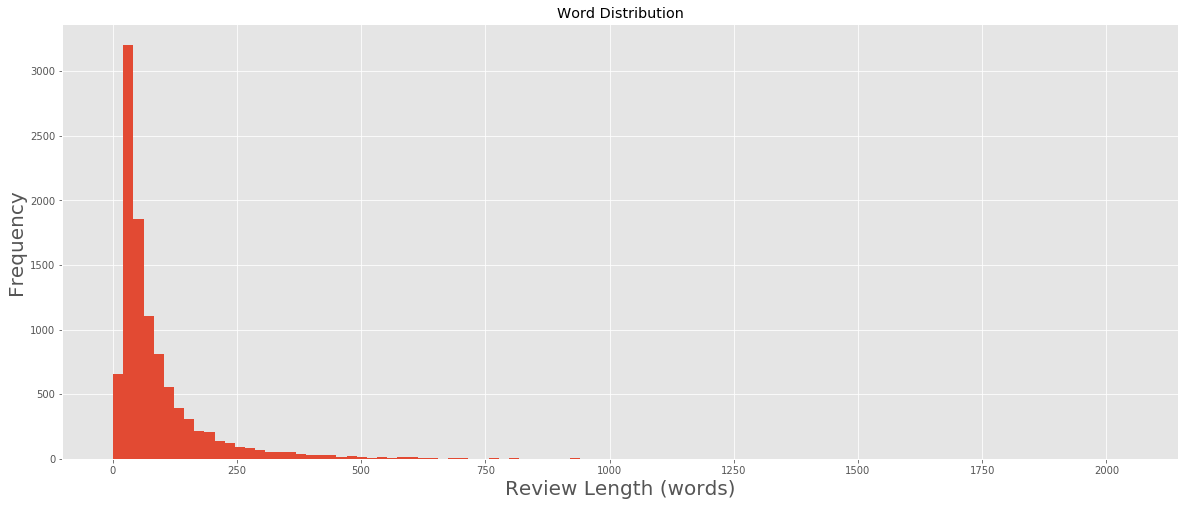

In [4]:
#looking at the distribution of number of words per review
#applying a lambda function to splits each complete review by spaces 
words_per_review = amazon_df.reviewText.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100, figsize=(20,8))
plt.title('Word Distribution')
plt.xlabel('Review Length (words)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

In [5]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Average words: 91.66679660851769
Skewness: 4.843544207252892


The number of words per user review is highly positive skewed with mean of 91, which means that on average, user reviews have 99 words.

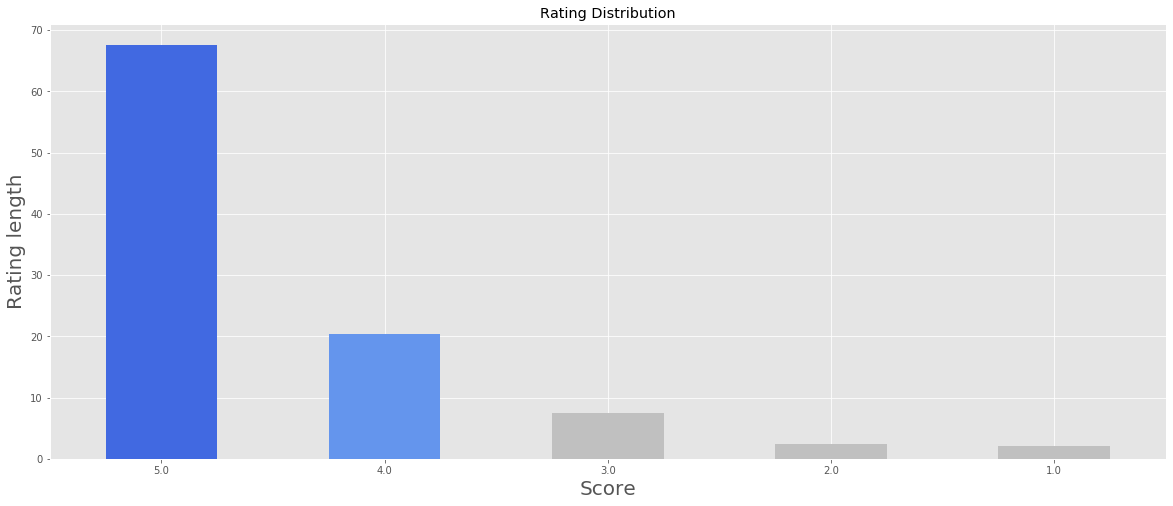

In [6]:
#look at the distribution of ratings
percent_val = 100 * amazon_df['overall'].value_counts()/len(amazon_df)
percent_val.plot.bar(figsize=(20,8), color=['royalblue','cornflowerblue','silver','silver','silver'])
plt.ylabel('Rating length', fontsize=20)
plt.title('Rating Distribution')
plt.xticks(rotation=0,horizontalalignment="center")
plt.xlabel('Score', fontsize=20)
plt.show()

The distribution is quite skewed, with a giant number of 5s and very few 3s, 2s, and 1s.

### Text visualization using word clouds (*word clouds* )


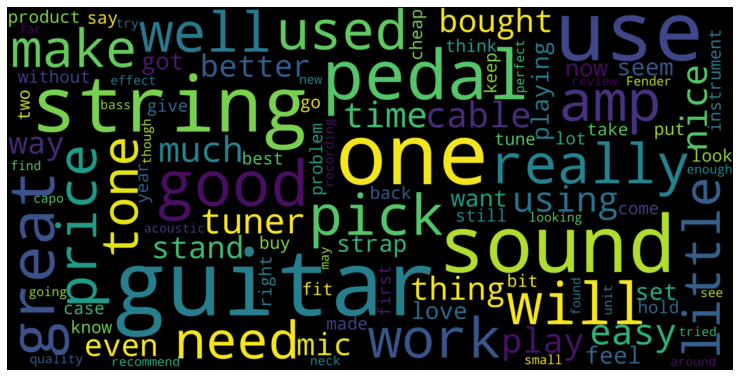

In [7]:
'''The wordcloud will gives us the distribution of the text. Words that appear bigger 
have high frequency in the review and words that appear small have low frequency in 
the review.'''


word_cloud_text = ''.join(amazon_df['reviewText'])

wordcloud = WordCloud(max_font_size=100, # maximum font size for the largest word
                      max_words=100, # the maximum number of words
                      background_color="black", # background color for the word cloud image
                      scale = 10, # scaling between computation and drawing
                      width=800, # width of the canvas
                      height=400 # height of the canvas
                     ).generate(word_cloud_text)

plt.figure(figsize=(13,10))
plt.imshow(wordcloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()



The word cloud indicates that many of the reviews talk about music-related things - guitar, sound, tuner, play, pedal. We also see some positive words like good, easy, great. The only negative word that appear is "problem".  This wordcloud corellates with the rating distributions as there were more postive rating.

### Standardizing the ratings for sentiment analysis 

In [8]:
'''
for the purpose of sentiment analysis , the ratings will be converted to binary values 
and be used as the target values.

ratings of 4 or 5 will be mapped to 1 and will be reltead to positive reviews.
ratings of 1 or 2 will get mapped to 0 and will be related to negative reviews.
ratings of 3 will get removed since they will represent neutral reviews.
'''
amazon_df['sentiment_rating'] = np.where(amazon_df.overall > 3,1,0)

# removing neutral reviews 
amazon_df = amazon_df[amazon_df.overall != 3]

# printing the counts of each class
amazon_df['sentiment_rating'].value_counts()

1    9022
0     467
Name: sentiment_rating, dtype: int64

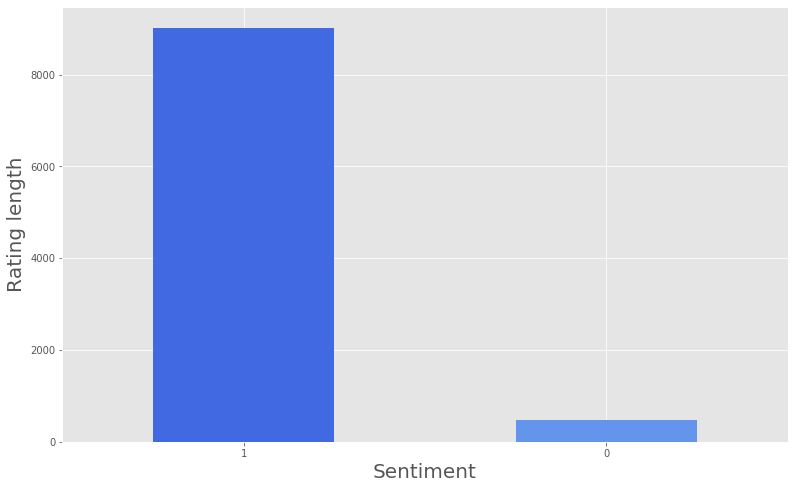

In [9]:
amazon_df.sentiment_rating.value_counts().plot.bar(figsize=(13,8),color=['royalblue','cornflowerblue'])
plt.ylabel('Rating length', fontsize = 20)
plt.xticks(rotation=0,horizontalalignment="center")
plt.xlabel('Sentiment', fontsize=20)

plt.show()

## Pre-processing

Text-processing  is crucil before building a machine learning model.Text-processing includes:
1. Converting words to lower/upper case
2. Removing special characters
3. Removing stopwords and high/low-frequency words
4. Stemming/lemmatization

### 1. Converting words to lower/upper case



In [10]:
#converting all of the words into a consistent case format - lowercase
amazon_df['reviews_text_new'] = amazon_df['reviewText'].str.lower()

In [11]:
#reviews not converted to lowercase
token_lists = [word_tokenize(each) for each in amazon_df['reviewText']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

#reviews converted to lowercase
token_lists_lower = [word_tokenize(each) for each in amazon_df['reviews_text_new']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))

Number of unique tokens then:  33791
Number of unique tokens now:  29311


The number of tokens has gone down by 13% just from normalizing the corpus.

### 2. Removing special characters

people often uses special characters (emojies, exclamation marks ...)to express theirs emotions.The presence of exclamation marks clearly indicates something about the underlying sentiment, so its not going to be removed , but non-emotionally charged punctuation such as commas, periods, and semicolons is safe to remove it.

In [12]:


# Selecting non alpha numeric charactes that are not spaces
spl_chars = amazon_df['reviews_text_new'].apply(lambda review: 
            [char for char in list(review) if not char.isalnum() and char != ' '])

## Getting list into a single list
flat_list = [item for sublist in spl_chars for item in sublist]

##  gives a list unique special characters that are presented on the reviews
set(flat_list)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [13]:
'''
Removing the special characters from the reviews by applying the regular expression 
[^A-Za-z0-9 ]. The regular expression means that its should only accept upper case 
character,lower case characters,  number characters , and the rest should be removed.
'''
review_backup = amazon_df['reviews_text_new'].copy()
amazon_df['reviews_text_new'] = amazon_df['reviews_text_new'].str.replace(r'[^A-Za-z0-9 ]+', ' ')

In [14]:
#seeing how the reviews change after removing special characters:
print("- Old Review -")
print(review_backup.values[6])
print("\n- New Review -")
print(amazon_df['reviews_text_new'][6])

- Old Review -
i have used monster cables for years, and with good reason. the lifetime warranty is worth the price alone. simple fact: cables break, but getting to replace them at no cost is where it's at.

- New Review -
i have used monster cables for years  and with good reason  the lifetime warranty is worth the price alone  simple fact  cables break  but getting to replace them at no cost is where it s at 


From the statement above , we can see that the semicolumn, comma and full stop has been remove and replace with space.

### 3. Stopwords and high/low frequency words

StopswordS such as "but, maybe, also" appears very frequently in the english language. Stopwords does not give any additional meaning to the reviews, so the folling code woudl remove it.

In [15]:
from nltk.corpus import stopwords
# reviewing what languages are available in the nltk package
print('Available languages for NLTK v.3.4.5: ')
print(stopwords.fileids())

Available languages for NLTK v.3.4.5: 
['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [16]:
#reviewing the list of English stopwords
noise_words = []
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
#testing the stopword in the review

stop_words = set(eng_stop_words)
without_stop_words = []
stopword = []
sentence = amazon_df['reviews_text_new'][0]
words = nltk.word_tokenize(sentence)

for word in words:
    if word in stop_words:
        stopword.append(word)
    else:
        without_stop_words.append(word)

print('-- Original Sentence --\n', sentence)
print('\n-- Stopwords in the sentence --\n', stopword)
print('\n-- Non-stopwords in the sentence --\n', without_stop_words)

-- Original Sentence --
 not much to write about here  but it does exactly what it s supposed to  filters out the pop sounds  now my recordings are much more crisp  it is one of the lowest prices pop filters on amazon so might as well buy it  they honestly work the same despite their pricing 

-- Stopwords in the sentence --
 ['not', 'to', 'about', 'here', 'but', 'it', 'does', 'what', 'it', 's', 'to', 'out', 'the', 'now', 'my', 'are', 'more', 'it', 'is', 'of', 'the', 'on', 'so', 'as', 'it', 'they', 'the', 'same', 'their']

-- Non-stopwords in the sentence --
 ['much', 'write', 'exactly', 'supposed', 'filters', 'pop', 'sounds', 'recordings', 'much', 'crisp', 'one', 'lowest', 'prices', 'pop', 'filters', 'amazon', 'might', 'well', 'buy', 'honestly', 'work', 'despite', 'pricing']


In [18]:
#revoming  stopwords from the reviews:

def stopwords_removal(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

amazon_df['reviews_text_nonstop'] = amazon_df['reviews_text_new'].apply(lambda row: stopwords_removal(stop_words, row))
amazon_df[['reviews_text_new','reviews_text_nonstop']]

,reviews_text_new,reviews_text_nonstop
0,not much to write about here but it does exac...,"[much, write, exactly, supposed, filters, pop,..."
1,the product does exactly as it should and is q...,"[product, exactly, quite, affordable, realized..."
2,the primary job of this device is to block the...,"[primary, job, device, block, breath, would, o..."
3,nice windscreen protects my mxl mic and preven...,"[nice, windscreen, protects, mxl, mic, prevent..."
4,this pop filter is great it looks and perform...,"[pop, filter, great, looks, performs, like, st..."
...,...,...
10256,great just as expected thank to all,"[great, expected, thank]"
10257,i ve been thinking about trying the nanoweb st...,"[thinking, trying, nanoweb, strings, bit, put,..."
10258,i have tried coated strings in the past incl...,"[tried, coated, strings, past, including, elix..."
10259,well made by elixir and developed with taylor...,"[well, made, elixir, developed, taylor, guitar..."


### 4. Stemming & lemmatization

**Stemming** works by cutting off the end or the beginning of the word, taking into account a list of common prefixes and suffixes that can be found.

**Lemmatization** takes into consideration the morphological analysis of the words. So lemmatization considers the grammar of the word and tries to find the root word instead of just getting to the root word by brute force methods.

In [19]:
from nltk.stem import PorterStemmer, LancasterStemmer 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/goundosidibe/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Building a machine learning model

In [20]:
#we are going to use only the impotant columns

In [21]:
amazon_df[['reviewText','overall','sentiment_rating']].head(5)

,reviewText,overall,sentiment_rating
0,"Not much to write about here, but it does exac...",5.0,1
1,The product does exactly as it should and is q...,5.0,1
2,The primary job of this device is to block the...,5.0,1
3,Nice windscreen protects my MXL mic and preven...,5.0,1
4,This pop filter is great. It looks and perform...,5.0,1


### Bag-of-words and n-grams

In [22]:
'''using n-grams to retains the structure of the overall document, and
paves the way for analyzing words in context. '''

from nltk import ngrams

#using bag of words to analyse the frequency of a word appearing in the text.
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer()
X = vec.fit_transform(amazon_df['reviews_text_new'])
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
df.head()

,00,000,000s,001,003,004,0045,007,008,008ex,...,zombie,zone,zoom,zooms,zt,zune,zvex,zylgian,zz,zzounds
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
#creating a python object of the class CountVectorizer

bow_counts = CountVectorizer(tokenizer= word_tokenize,
                             ngram_range=(1,4))

bow_data = bow_counts.fit_transform(amazon_df.reviews_text_new)

In [24]:
bow_data

<9489x1581188 sparse matrix of type '<class 'numpy.int64'>'
	with 3084491 stored elements in Compressed Sparse Row format>

A parse matrix of 9489 observations (number of rows of the reviews_text_new series) has been built, and 1581188 columns corresponding to the features extracted by means of the representation of the 1-gram count of the user reviews.

### Split data into train dataset and test dataset

In [25]:

X_train, X_test, y_train, y_test = train_test_split(bow_data, # Features
                                                                    amazon_df['sentiment_rating'], # Target variable
                                                                    test_size = 0.2, # 20% test size
                                                                    random_state = 0) # random state for replication purposes

In [26]:
y_test.value_counts()/y_test.shape[0]

1    0.951001
0    0.048999
Name: sentiment_rating, dtype: float64

The test data contains 95% positive sentiment reviews. So, if we were to naively classify all reviews as positive, then our model would achieve an accuracy of 95%. Therefore, this is the baseline that any model I create must beat. There is an imbalance in the classes,however this will be ignored and focus on deploying the machine learning models.

### Applying the machine learning models (LogisticRegression,Naive Bayes, SVM)

In [27]:
models = []

models.append(('LGR', LogisticRegression()))
models.append(('MNB', MultinomialNB()))
models.append(('SVM', SVC()))

In [28]:
# import all the models, then train model using 10-folds- cross validation.
results = []
names = []
cv_results = []
for name, model in models:
    # the data set is split into 10 folds
    kfold = KFold(n_splits=10)
    #finds the accuracy of all 10 folds
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    #calculates the mean and standard deviation.
    msg =  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


LGR: 0.953761 (0.006491)
MNB: 0.950205 (0.006576)
SVM: 0.950732 (0.006483)


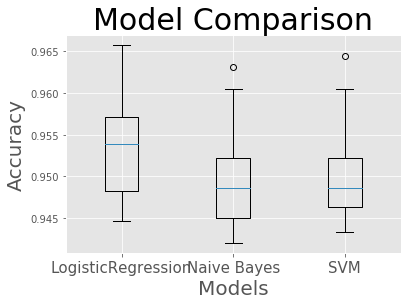

In [29]:
#compare the accuracy of the models

plt.boxplot(results)
plt.title('Model Comparison', fontsize=30)
plt.xlabel('Models', fontsize=20)
plt.ylabel('Accuracy', fontsize=20)
plt.xticks([1, 2, 3], ['LogisticRegression', 'Naive Bayes', 'SVM'], fontsize=15)
plt.show()



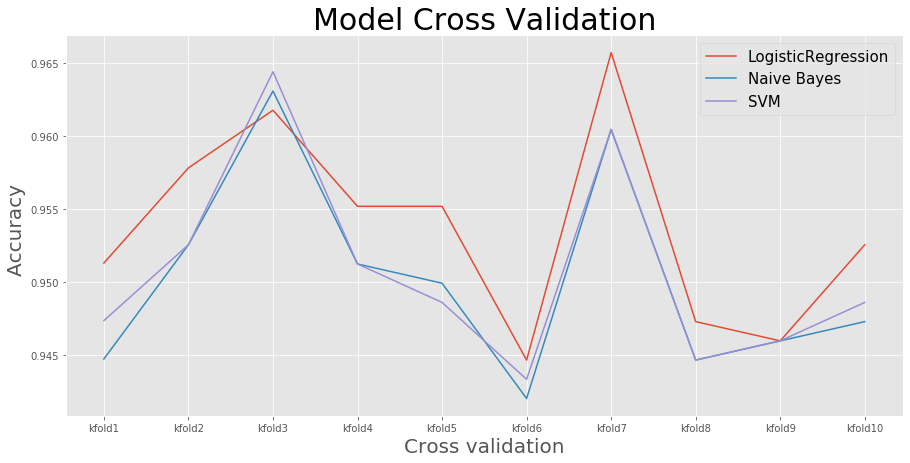

In [30]:
Kfods_results = pd.DataFrame(results)

Kfods_results.columns = ['kfold1','kfold2','kfold3','kfold4','kfold5',
                         'kfold6','kfold7','kfold8','kfold9','kfold10']

# Change the row indexes 
Kfods_results.index= ['LogisticRegression', 'Naive Bayes', 'SVM' 
                ] 

df_t = Kfods_results.T

#visualise the accuracy of the 10 folds graphically  
plt.figure(figsize=(15, 7))
plt.plot(df_t)
plt.title('Model Cross Validation', fontsize=30)
plt.xlabel("Cross validation", fontsize=20)
plt.ylabel("Accuracy ", fontsize=20)
plt.legend(df_t, fontsize=15)
plt.show()

# Testing the models

## Logistic regression

In [31]:
### Training the model
LRG = LogisticRegression()
train_LRG= LRG.fit(X_train, y_train)
## Predicting the output
y_pred = train_LRG.predict(X_test)
#compare our predictions to the ground truth
print("predicted values:", y_pred,"\n")
print("target values:", y_pred,"\n")
print('accuracy :',accuracy_score(y_test,y_pred),"\n")
print(classification_report(y_test,y_pred),"\n")

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print("confusion matrix:",confusion_matrix)

predicted values: [1 1 1 ... 1 1 1] 

target values: [1 1 1 ... 1 1 1] 

accuracy : 0.9541622760800843 

              precision    recall  f1-score   support

           0       0.71      0.11      0.19        93
           1       0.96      1.00      0.98      1805

    accuracy                           0.95      1898
   macro avg       0.84      0.55      0.58      1898
weighted avg       0.94      0.95      0.94      1898
 

confusion matrix: [[  10   83]
 [   4 1801]]


# SVM

In [32]:
## SVM
SVM = SVC()
train_svm = SVM.fit(X_train,y_train)
pred = train_svm.predict(X_test)
#compare our predictions to the ground truth
print("predicted values:", pred,"\n")
print("target values:", pred,"\n")
print('accuracy :',accuracy_score(y_test,pred),"\n")
print(classification_report(y_test,pred),"\n")
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, pred)
print("confusion matrix:",c_matrix)

predicted values: [1 1 1 ... 1 1 1] 

target values: [1 1 1 ... 1 1 1] 

accuracy : 0.9510010537407798 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        93
           1       0.95      1.00      0.97      1805

    accuracy                           0.95      1898
   macro avg       0.48      0.50      0.49      1898
weighted avg       0.90      0.95      0.93      1898
 

confusion matrix: [[   0   93]
 [   0 1805]]


# Naive Bayes

In [33]:
naive_bayes =  MultinomialNB()
train_nb = naive_bayes.fit(X_train,y_train)
y_pred = train_nb.predict(X_test)
#compare our predictions to the ground truth
print("predicted values:", y_pred,"\n")
print("target values:", y_pred,"\n")
print('accuracy :',accuracy_score(y_test,y_pred),"\n")
print(classification_report(y_test,y_pred),"\n")
from sklearn.metrics import confusion_matrix
c_matrix = confusion_matrix(y_test, y_pred)
print("confusion matrix:",c_matrix)

predicted values: [1 1 1 ... 1 1 1] 

target values: [1 1 1 ... 1 1 1] 

accuracy : 0.9504741833508957 

              precision    recall  f1-score   support

           0       0.33      0.01      0.02        93
           1       0.95      1.00      0.97      1805

    accuracy                           0.95      1898
   macro avg       0.64      0.50      0.50      1898
weighted avg       0.92      0.95      0.93      1898
 

confusion matrix: [[   1   92]
 [   2 1803]]


# Top 15 words in  positive reviews

In [34]:
# # Import package
from wordcloud import WordCloud, STOPWORDS


lr_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names(), # ge tall the n-gram feature names
                                   train_LRG.coef_[0])), # get the logistic regression coefficients
                          columns= ['words','weights']) # defining the colunm names

# # top-15 more important features for negative reviews
top =lr_weights.sort_values(['weights'], ascending = False) # top-15 more important features for positive reviews
top.head(15)

,words,weights
518359,great,0.774709
855631,nice,0.603198
1549241,works,0.562229
978844,perfect,0.496715
1500597,well,0.483953
395325,easy,0.474455
509319,good,0.458594
763044,love,0.452870
1461654,using,0.432530
229075,best,0.420799


# Top 15 words in  negative reviews

In [35]:
l_weights = pd.DataFrame(list(zip(bow_counts.get_feature_names(), # ge tall the n-gram feature names
                                   train_LRG.coef_[0])), # get the logistic regression coefficients
                          columns= ['words','weights']).sort_values(['weights'], ascending = True) # defining the colunm names



l_weights.head(15)

,words,weights
867078,not,-0.748705
1158101,something,-0.661469
414499,even,-0.546868
1072881,returned,-0.537064
199215,back,-0.476164
1410542,too,-0.433003
256099,broke,-0.425261
260990,but,-0.422841
1495115,way,-0.409820
1223730,t fit,-0.407634


# Conclusion

I cleaned up and featurized the Amazon reviews dataset and built several classification models to predict sentiment. Through increase the set of n-grams, I used from 1-grams to up to 4-grams. All y models gave an accuracy of 95%.


Building machine learning models on text is a very involved discipline. Some important are learned are that although there are different types of pre-processing involved in textual data, **not everything has to be applied in each case**. For instance, when dealing with text messages special characters might represent important information and need not be removed. Furthermore, upper case may mean someone is angry and represents shouting, so case may not need to be normalized either. Also, every NLP classification task is different, but the process to be followed is similar to what I did in this case: wrangle the data, create features from text  and train ML models.